## インストール
pip install h5py keras==2.0.4 tensorflow==1.1.0 matplotlib

In [6]:
import numpy as np
import keras

from keras.utils import np_utils
from keras.datasets import mnist
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Activation, Dense, Dropout, Flatten

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32')/255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32')/255
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

model = keras.models.Sequential()
model.add(Convolution2D(nb_filter=20, nb_row=5, nb_col=5,
                        border_mode='valid',
                        input_shape=(28, 28, 1)))
model.add(Activation("relu"))
model.add(Convolution2D(nb_filter=15, nb_row=5, nb_col=5))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

model.fit(x_train, y_train,  batch_size=100, nb_epoch=3, verbose=1)

score = model.evaluate(x_test, y_test, verbose=0)

print("test-accuracy: {}".format(score[1]))

model_json_str = model.to_json()
open('model.json', 'w').write(model_json_str)
model.save_weights('weights.h5')


/home/ybin/env/ml/lib/python3.5/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=20, input_shape=(28, 28, 1..., kernel_size=(5, 5), padding="valid")`
/home/ybin/env/ml/lib/python3.5/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=15, kernel_size=(5, 5))`
/home/ybin/env/ml/lib/python3.5/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/3
60000/60000 [==============================] - 76s - loss: 0.3122 - acc: 0.9014    
Epoch 2/3
60000/60000 [==============================] - 69s - loss: 0.1163 - acc: 0.9644    
Epoch 3/3
60000/60000 [==============================] - 69s - loss: 0.0887 - acc: 0.9739    
test-accuracy: 0.9884


20/20 [==============================] - 0s


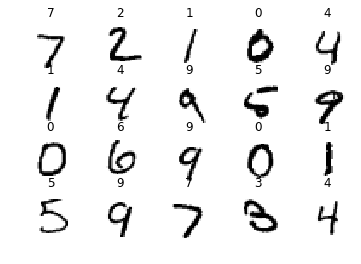

In [8]:
import numpy as np
import pylab
import keras

from keras.utils import np_utils
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32')/255

model = keras.models.model_from_json(open('model.json').read())
model.load_weights('weights.h5')
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

tests = x_test[:20]
labels = model.predict(tests, verbose=1)

for index, (image, label) in enumerate(zip(tests, labels)):
    pylab.subplot(4, 5, index + 1)
    pylab.axis('off')
    pylab.imshow(image.reshape(28, 28), cmap=pylab.cm.gray_r, interpolation='nearest')
    pylab.title(np.argmax(label))
pylab.show()